In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [100]:
data_path = r'D:\2019-Nov-100k.csv'
df = pd.read_csv(data_path, nrows = 100000)
print(f"Data loaded successfully with {len(df):,} rows and {df.shape[1]} columns.")
print("Columns present in the dataset: ")
print(df.columns.to_list())

Data loaded successfully with 100,000 rows and 9 columns.
Columns present in the dataset: 
['event_time', 'event_type', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id', 'user_session']


In [101]:
print("Detailed information about the dataset: ")
print(df.info())
print("Descriptive statistics for numerical columns: ")
print(df.describe())

Detailed information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     100000 non-null  object 
 1   event_type     100000 non-null  object 
 2   product_id     100000 non-null  int64  
 3   category_id    100000 non-null  int64  
 4   category_code  66160 non-null   object 
 5   brand          84224 non-null   object 
 6   price          100000 non-null  float64
 7   user_id        100000 non-null  int64  
 8   user_session   100000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB
None
Descriptive statistics for numerical columns: 
        product_id             category_id      price       user_id
count   100000.000              100000.000 100000.000    100000.000
mean  11235774.525 2057925778231054592.000    281.540 535487106.019
std   12198073.903   1965420217338580


 🛒 Statistics of behaviour types in the dataset: 
event_type
view        97489
purchase     1422
cart         1089
Name: count, dtype: int64


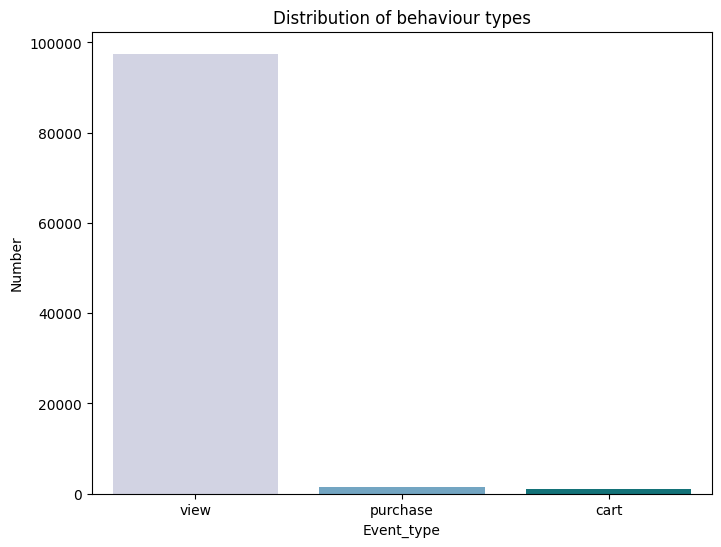

The first 5 rows of the dataset: 
                event_time event_type  product_id          category_id              category_code   brand   price    user_id                          user_session                 even_time
0  2019-11-01 00:00:00 UTC       view     1003461  2053013555631882655     electronics.smartphone  xiaomi 489.070  520088904  4d3b30da-a5e4-49df-b1a8-ba5943f1dd33 2019-11-01 00:00:00+00:00
1  2019-11-01 00:00:00 UTC       view     5000088  2053013566100866035  appliances.sewing_machine  janome 293.650  530496790  8e5f4f83-366c-4f70-860e-ca7417414283 2019-11-01 00:00:00+00:00
2  2019-11-01 00:00:01 UTC       view    17302664  2053013553853497655                        NaN   creed  28.310  561587266  755422e7-9040-477b-9bd2-6a6e8fd97387 2019-11-01 00:00:01+00:00
3  2019-11-01 00:00:01 UTC       view     3601530  2053013563810775923  appliances.kitchen.washer      lg 712.870  518085591  3bfb58cd-7892-48cc-8020-2f17e6de6e7f 2019-11-01 00:00:01+00:00
4  2019-11-01 00:00:0

In [102]:
print("\n 🛒 Statistics of behaviour types in the dataset: ")
event_counts = df['event_type'].value_counts()
print(event_counts)
plt.figure(figsize=(8,6))
sns.barplot(x = event_counts.index, y = event_counts.values, palette='PuBuGn')
plt.title("Distribution of behaviour types")
plt.xlabel("Event_type")
plt.ylabel("Number")
plt.show()
df['even_time'] = pd.to_datetime(df['event_time'])
print("The first 5 rows of the dataset: ")
print(df.head())

In [103]:
print("Checking the proportion of missing data in the dataset...")
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

if missing_percent.empty:
    print("✅ There is no missing data in the dataset!")
else:
    print("⚠️ Columns with missing values: ")
    display(missing_percent)

Checking the proportion of missing data in the dataset...
⚠️ Columns with missing values: 


category_code   33.840
brand           15.776
dtype: float64

In [104]:
print("Processing missing values...\n")

if 'price' in df.columns:
    missing_price = df['price'].isnull().sum()
    print(f"The price column has {missing_price:,} missing values -> Replace by the median.")
    df['price'] = df['price'].fillna(df['price'].median())
else:
    print("Cannot find the price column in the dataset.")

for col in ['category_code', 'brand']:
    if col in df.columns:
        missing_count = df[col].isnull().sum()
        print(f"Column '{col}' has {missing_count:,} missing values -> Replace by 'unknown'")
        df[col] = df[col].fillna('unknown')

print("After processing, the remaining missing columns(if any):")
print(df.isnull().sum()[df.isnull().sum() > 0])
display(df.head())

Processing missing values...

The price column has 0 missing values -> Replace by the median.
Column 'category_code' has 33,840 missing values -> Replace by 'unknown'
Column 'brand' has 15,776 missing values -> Replace by 'unknown'
After processing, the remaining missing columns(if any):
Series([], dtype: int64)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,even_time
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.070,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2019-11-01 00:00:00+00:00
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.650,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,2019-11-01 00:00:00+00:00
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,unknown,creed,28.310,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,2019-11-01 00:00:01+00:00
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.870,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,2019-11-01 00:00:01+00:00
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.270,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,2019-11-01 00:00:01+00:00


In [105]:
print("Converting the 'event_time' column to datetime format...")
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')
print("Datatype after convertibility: ")
print(df['event_time'].dtypes)
df['hour'] = df['event_time'].dt.hour
df['day'] = df['event_time'].dt.day
df['weekday'] = df['event_time'].dt.weekday
df.head()

Converting the 'event_time' column to datetime format...
Datatype after convertibility: 
datetime64[ns, UTC]


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,even_time,hour,day,weekday
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.070,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2019-11-01 00:00:00+00:00,0,1,4
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.650,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,2019-11-01 00:00:00+00:00,0,1,4
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,unknown,creed,28.310,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,2019-11-01 00:00:01+00:00,0,1,4
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.870,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,2019-11-01 00:00:01+00:00,0,1,4
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.270,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,2019-11-01 00:00:01+00:00,0,1,4


In [106]:
duplicates = df.duplicated().sum()
print(f"Number of completely duplicated rows: {duplicates:,}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"✓ Removed {duplicates:,} duplicate lines.")
else:
    print(f"No duplicated records.")

Number of completely duplicated rows: 27
✓ Removed 27 duplicate lines.


Product price statistics: 


count   99973.000
mean      281.554
std       342.420
min         0.000
25%        65.640
50%       164.950
75%       350.860
max      2574.070
Name: price, dtype: float64

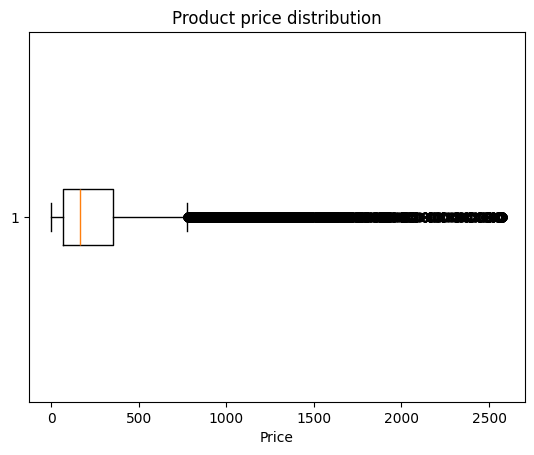

Lower bound: -362.19
Upper bound: 778.69
Numbers of outliers discovered: 8,090
Dataset after outliers elimination: 91,883 rows.
DataFrame final size: 91,883


In [107]:
print("Product price statistics: ")
display(df['price'].describe())
plt.boxplot(df['price'], vert=False)
plt.title("Product price distribution")
plt.xlabel("Price")
plt.show()

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Numbers of outliers discovered: {len(outliers):,}")

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(f"Dataset after outliers elimination: {len(df):,} rows.")
print(f"DataFrame final size: {len(df):,}")

In [108]:
num_cols = ['price', 'hour', 'day', 'weekday']
scaler = StandardScaler()
if len(df) > 0:
    df[num_cols] = scaler.fit_transform(df[num_cols])
    print("✓ Data successfully standardized (mean ≈ 0, std ≈ 1).")
else:
    print("⚠️ WARNING: DataFrame is empty (0 samples). Standardization step skipped.")
df[num_cols].head()

✓ Data successfully standardized (mean ≈ 0, std ≈ 1).


,price,hour,day,weekday
0,1.616,-2.083,0.000,0.000
1,0.524,-2.083,0.000,0.000
2,-0.960,-2.083,0.000,0.000
3,2.868,-2.083,0.000,0.000
4,-0.094,-2.083,0.000,0.000


In [109]:
df['is_purchase'] = (df['event_type'] == 'purchase').astype(int)
#Removing 'event_type' from the list of features to avoid data leakage
features = ['category_code', 'brand', 'price', 'hour', 'day', 'weekday']

X = df[features]
y = df['is_purchase']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Traning size(X_train): {X_train.shape}")
print(f"Testing size(X_test):  {X_test.shape}")

Traning size(X_train): (73506, 6)
Testing size(X_test):  (18377, 6)


In [110]:
print("----- Dtypes of X_train -----")
print(X_train.dtypes)
timestamp_cols = []
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        sample_vals = X_train[col].dropna().head(200).tolist()
        for v in sample_vals:
            if isinstance(v, (pd.Timestamp, pd.DatetimeTZDtype, np.datetime64)):
                timestamp_cols.append(col)
                break

dt_cols = list(X_train.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns)
print("\nDetected object-columns CONTAINING Timestamp instances:", timestamp_cols)
print("Detected datetime64 dtypes:", dt_cols)

----- Dtypes of X_train -----
category_code     object
brand             object
price            float64
hour             float64
day              float64
weekday          float64
dtype: object

Detected object-columns CONTAINING Timestamp instances: []
Detected datetime64 dtypes: []


In [111]:
sus = list(set(timestamp_cols + dt_cols))
if not sus:
    print("No datetime-like columns detected by heuristics.")
else:
    for c in sus:
        print(f"\n-- Column: {c} --")
        print("dtype:", X_train[c].dtype)
        print("Sample values (head 20):")
        display(X_train[c].head(20))

No datetime-like columns detected by heuristics.


In [112]:
for c in sus:
    try:
        X_train[c] = pd.to_datetime(X_train[c], errors='coerce')
        X_test[c] = pd.to_datetime(X_test[c], errors='coerce')
        X_train[c + '_hour'] = X_train[c].dt.hour
        X_train[c + '_day'] = X_train[c].dt.day
        X_train[c + '_weekday'] = X_train[c].dt.weekday
        X_test[c + '_hour'] = X_test[c].dt.hour
        X_test[c + '_day'] = X_test[c].dt.day
        X_test[c + '_weekday'] = X_test[c].dt.weekday
        X_train.drop(columns=[c], inplace=True)
        X_test.drop(columns=[c], inplace=True)
        print(f"Converted {c} -> {c}_hour/{c}_day/{c}_weekday and dropped original.")
    except Exception as e:
        print(f"Failed to convert {c}: {e}")

In [113]:
non_numeric = [c for c in X_train.columns if not pd.api.types.is_numeric_dtype(X_train[c])]
print("Non-numeric columns remaining:", non_numeric)
for c in non_numeric:
    print(f"\nColumn {c} dtype: {X_train[c].dtype}")
    display(X_train[c].head(10))

Non-numeric columns remaining: ['category_code', 'brand']

Column category_code dtype: object


2043                              unknown
14001    appliances.kitchen.refrigerators
82171              electronics.smartphone
53221              electronics.smartphone
41033                             unknown
13255                             unknown
9477                   apparel.shoes.keds
29137              electronics.smartphone
3390                              unknown
65514                             unknown
Name: category_code, dtype: object


Column brand dtype: object


2043     rondell
14001      haier
82171     xiaomi
53221    samsung
41033    unknown
13255    unknown
9477       asics
29137    samsung
3390        sony
65514    unknown
Name: brand, dtype: object

In [114]:
X_train_num = X_train.copy()
X_test_num = X_test.copy()
for col in X_train_num.columns:
    if not pd.api.types.is_numeric_dtype(X_train_num[col]):
        X_train_num[col] = pd.to_numeric(X_train_num[col], errors='coerce')
        X_test_num[col] = pd.to_numeric(X_test_num[col], errors='coerce')
print("Converted non-numeric columns to numeric where possible.")
print("Any remaining non-numeric types?", [c for c in X_train_num.columns if not pd.api.types.is_numeric_dtype(X_train_num[c])])

Converted non-numeric columns to numeric where possible.
Any remaining non-numeric types? []


In [115]:
for col in X_train_num.columns:
    if X_train_num[col].isnull().any():
        med = X_train_num[col].median()
        X_train_num[col].fillna(med, inplace=True)
        X_test_num[col].fillna(med, inplace=True)
print("Filled NaNs with median from training set.")
print("Final shapes:", X_train_num.shape, X_test_num.shape)

Filled NaNs with median from training set.
Final shapes: (73506, 6) (18377, 6)


In [116]:
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorial columns (pre-encode):", cat_cols)
if cat_cols:
    enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value = -1)
    X_train_num[cat_cols]= enc.fit_transform(X_train[cat_cols])
    X_test_num[cat_cols] = enc.transform(X_test[cat_cols])
    print("Encoded categorical columns.")

Categorial columns (pre-encode): ['category_code', 'brand']
Encoded categorical columns.


In [117]:
print("Any non-numeric left in X_train_num?", [c for c in X_train_num.columns if not pd.api.types.is_numeric_dtype(X_train_num[c])])
Xtr = X_train_num.values
Xte = X_test_num.values
print("Shapes to feed model:", Xtr.shape, Xte.shape)
#Training
model_nb = GaussianNB()
model_nb.fit(Xtr, y_train)
print("✅ Model trained successfully on numeric data.")

Any non-numeric left in X_train_num? []
Shapes to feed model: (73506, 6) (18377, 6)
✅ Model trained successfully on numeric data.


In [118]:
categorical_cols = ['category_code', 'brand']
numerical_cols = ['price', 'hour', 'day', 'weekday']

for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = X_test[col].map(lambda s: -1 if s not in le.classes_ else le.transform([s])[0])

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("✓ Data has been encoded and standardized according to the correct procedure.")

✓ Data has been encoded and standardized according to the correct procedure.


In [119]:
print("Class Distribution before using SMOTE:")
print(y_train.value_counts())
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Class Distribution after using SMOTE:")
print(y_train_smote.value_counts())

Class Distribution before using SMOTE:
is_purchase
0    72464
1     1042
Name: count, dtype: int64
Class Distribution after using SMOTE:
is_purchase
0    72464
1    72464
Name: count, dtype: int64


In [120]:
model_nb = GaussianNB()
model_nb.fit(X_train_smote, y_train_smote)
print("Gaussian Naive Bayes model has been trained successfully.")

Gaussian Naive Bayes model has been trained successfully.


In [121]:
print("📊 Detailed classification report:\n")
print(classification_report(Y_test, Y_pred_nb))

📊 Detailed classification report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18116
           1       0.00      0.00      0.00       261

    accuracy                           0.99     18377
   macro avg       0.49      0.50      0.50     18377
weighted avg       0.97      0.99      0.98     18377



'purchase' proportion of the Naive Bayes model: 0.0000
📊 Classification report for the random prediction model:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18116
           1       0.00      0.00      0.00       261

    accuracy                           0.99     18377
   macro avg       0.49      0.50      0.50     18377
weighted avg       0.97      0.99      0.98     18377



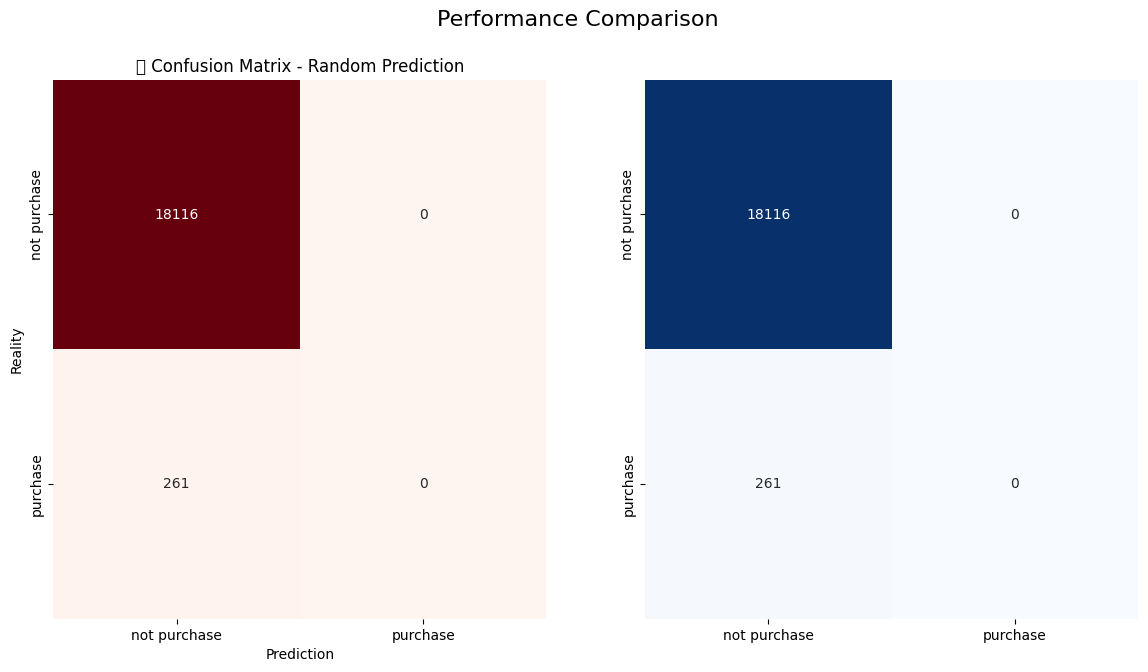

In [122]:
nb_prediction_rate =np.mean(y_pred_nb)
print(f"'purchase' proportion of the Naive Bayes model: {nb_prediction_rate:.4f}")
np.random.seed(42)
y_pred_random = np.random.choice([0, 1], size=len(y_test), p = [1 - nb_prediction_rate, nb_prediction_rate])
print("📊 Classification report for the random prediction model:")
print(classification_report(y_test, y_pred_random))

cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_random = confusion_matrix(y_test, y_pred_random)

fig, axes = plt.subplots(1, 2, figsize = (14,7))
sns.heatmap(cm_nb, annot=True, fmt = 'd', cmap = 'Reds', cbar=False, ax=axes[0], 
            xticklabels = ['not purchase', 'purchase'],
            yticklabels = ['not purchase', 'purchase'])
axes[0].set_title("🔍 Confusion Matrix - Naive Bayes")
axes[0].set_xlabel("Prediction")
axes[0].set_ylabel("Reality")

sns.heatmap(cm_nb, annot=True, fmt = 'd', cmap = 'Blues', cbar=False, ax=axes[1],
            xticklabels = ['not purchase', 'purchase'],
            yticklabels = ['not purchase', 'purchase'])
axes[0].set_title("🔍 Confusion Matrix - Random Prediction")
axes[0].set_xlabel("Prediction")
axes[0].set_ylabel("Reality")

plt.suptitle('Performance Comparison', fontsize=16)
plt.show()